In [2]:
import matplotlib as mpl
mpl.use('agg')
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.integrate as integrate

C:\Users\Conrad\Anaconda2\lib\site-packages\matplotlib\__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [3]:
%matplotlib inline

In [106]:
def constrained_planar_SHO_polar(state,t,m,k,w,l0):
    r         = state[0]
    r_dot     = state[1]
    w0_sqr    = k/m
    return np.array([r_dot,(w**2 - w0_sqr)*r + k*l0])

In [107]:
def E_and_L_polar(eph,m,k,w,l0):
    num_points = len(eph)
    conserved  = np.zeros((num_points,2))
    
    index = 0
    for record in eph:
        r                  = record[0]
        r_dot              = record[1]
        T                  = 0.5*m*(r_dot**2 + r**2*w**2)
        V                  = 0.5*k*(r-l0)**2
        conserved[index,0] = T + V
        conserved[index,1] = 0.5*m*r_dot**2 - 0.5*m*r**2*w**2 + 0.5*k*(r-l0)**2
        index              = index + 1
        
    return conserved

In [120]:
m     = 1.0
k     = 2.0
w     = np.sqrt(k/m) - 0.7
l0    = 0.5
parms = {'k':k,'m':m}
L     = k*l0/(k/m-w**2)

In [109]:
R        = 0.1
S0_polar = np.array([R,0.0])

In [110]:
period    = 2*np.pi/np.sqrt(np.abs(w**2 - k/m))
print period
time_span = np.arange(0.0,2*period,0.1)

5.14756045533


In [111]:
eph_polar = integrate.odeint(constrained_planar_SHO_polar,S0_polar,time_span,args=(m,k,w,l0))

In [112]:
conserved_polar = E_and_L_polar(eph_polar,m,k,w,l0)

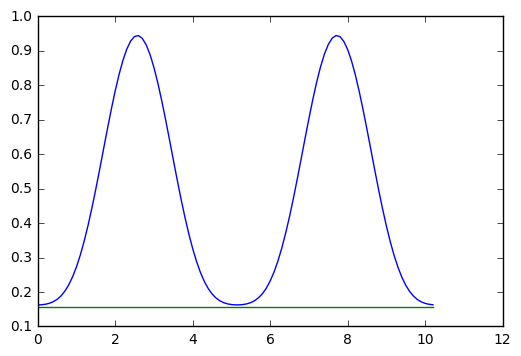

In [113]:
plt.plot(time_span,conserved_polar)

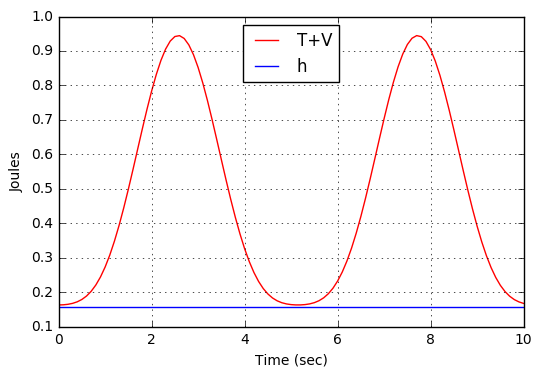

In [122]:
plt.plot(time_span,conserved_polar[:,0],'r-',label='T+V')
plt.plot(time_span,conserved_polar[:,1],'b-',label='h')
plt.xlabel('Time (sec)')
plt.ylabel('Joules')
plt.legend(loc='upper center')
plt.xlim([0,10])
plt.grid('on')

(0, 10)

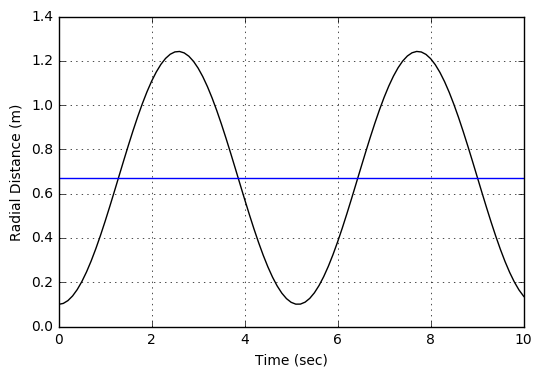

In [121]:
plt.plot(time_span,eph_polar[:,0],'k-')
plt.xlabel('Time (sec)')
plt.ylabel('Radial Distance (m)')
plt.grid('on')
plt.axhline(L)
plt.xlim([0,10])